In [6]:
import os
import pickle
import torch
import numpy as np
from math import ceil
from model_vc import Generator


def pad_seq(x, base=32):
    len_out = int(base * ceil(float(x.shape[0])/base))
    len_pad = len_out - x.shape[0]
    assert len_pad >= 0
    return np.pad(x, ((0,len_pad),(0,0)), 'constant'), len_pad

device = 'cuda'
G = Generator(32,256,512,32).eval().to(device)

g_checkpoint = torch.load('autovc.ckpt', map_location=device)
G.load_state_dict(g_checkpoint['model'])

metadata = pickle.load(open('metadata.pkl', "rb"))

spect_vc = []

for sbmt_i in metadata:
             
    x_org = sbmt_i[2]
    x_org, len_pad = pad_seq(x_org)
    uttr_org = torch.from_numpy(x_org[np.newaxis, :, :]).to(device)
    emb_org = torch.from_numpy(sbmt_i[1][np.newaxis, :]).to(device)
    
    for sbmt_j in metadata:
                   
        emb_trg = torch.from_numpy(sbmt_j[1][np.newaxis, :]).to(device)
        
        with torch.no_grad():
            _, x_identic_psnt, _ = G(uttr_org, emb_org, emb_trg)
            
        if len_pad == 0:
            uttr_trg = x_identic_psnt[0, 0, :, :].cpu().numpy()
        else:
            uttr_trg = x_identic_psnt[0, 0, :-len_pad, :].cpu().numpy()
        
        spect_vc.append( ('{}x{}'.format(sbmt_i[0], sbmt_j[0]), uttr_trg) )
        
        
with open('results_example.pkl', 'wb') as handle:
    pickle.dump(spect_vc, handle)          

C:\Users\oscac\AppData\Local\Temp\ipykernel_49436\600978592.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  g_checkpoint = torch.load('autovc.ckpt', map_location=device

# Visualizaciones

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrogram(spectrogram, title=None):
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.T, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    if title:
        plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

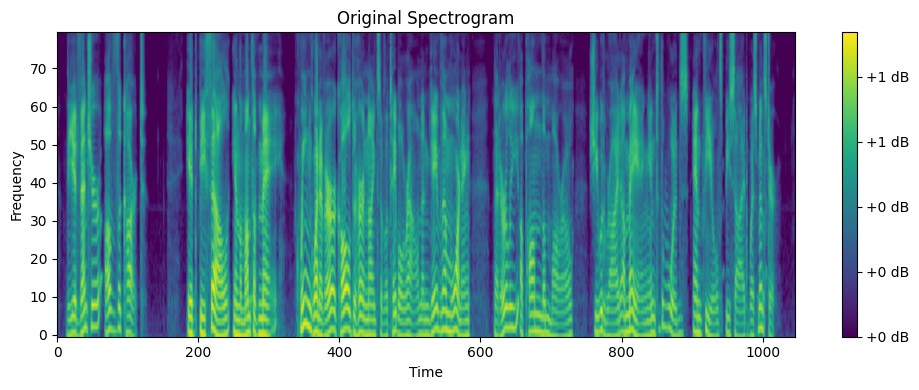

In [ ]:
plot_spectrogram(spec, title='Original Spectrogram')

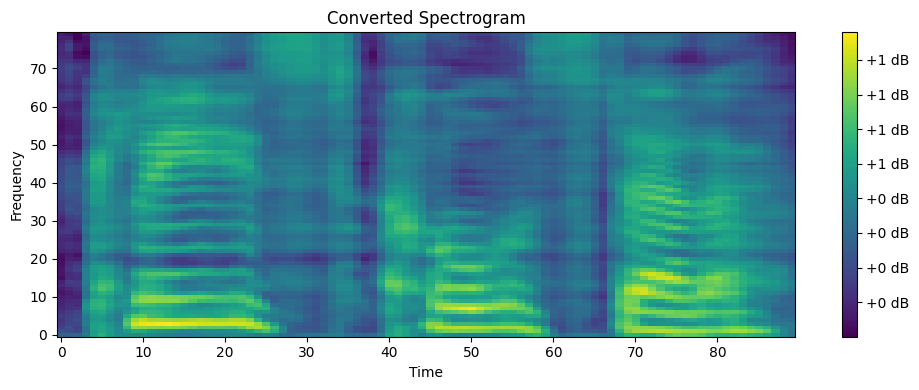

In [7]:
plot_spectrogram(spect_vc[0][1], title='Converted Spectrogram')

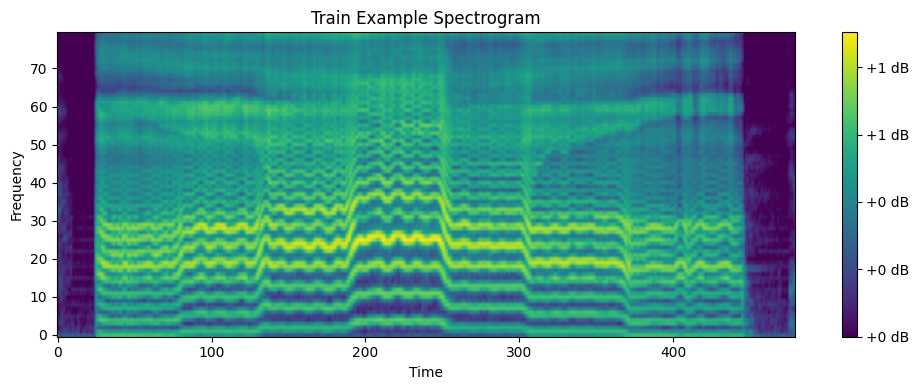

In [16]:
plot_spectrogram(train_example, title='Train Example Spectrogram')

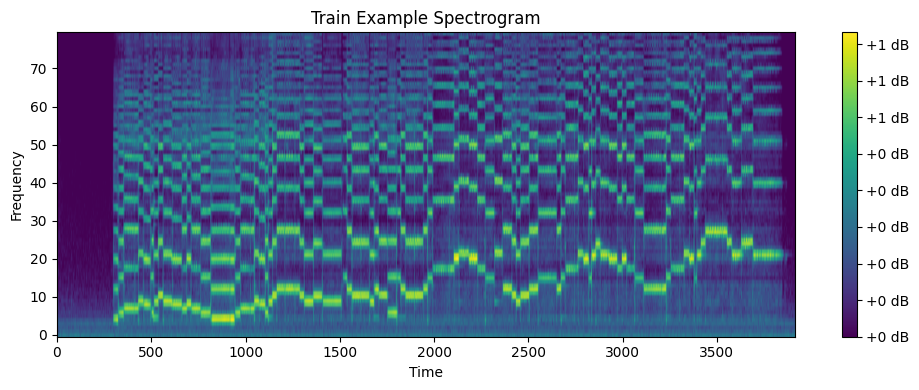

In [18]:
plot_spectrogram(train_example, title='Train Example Spectrogram')

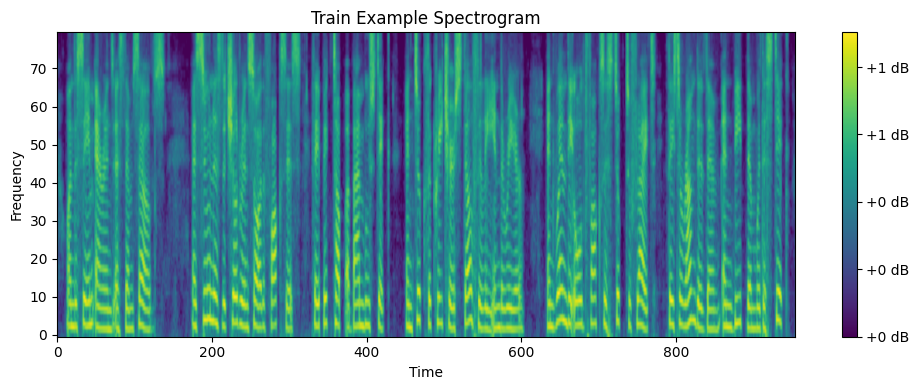

In [21]:
plot_spectrogram(train_example, title='Train Example Spectrogram')

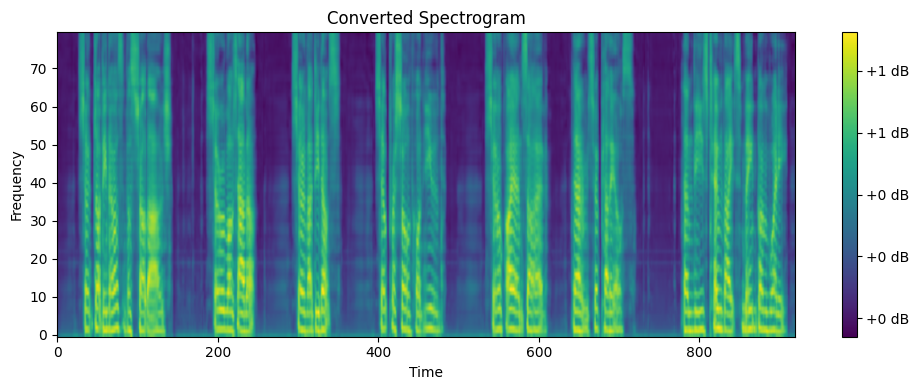

In [36]:
plot_spectrogram(spect_vc[0][1], title='Converted Spectrogram')

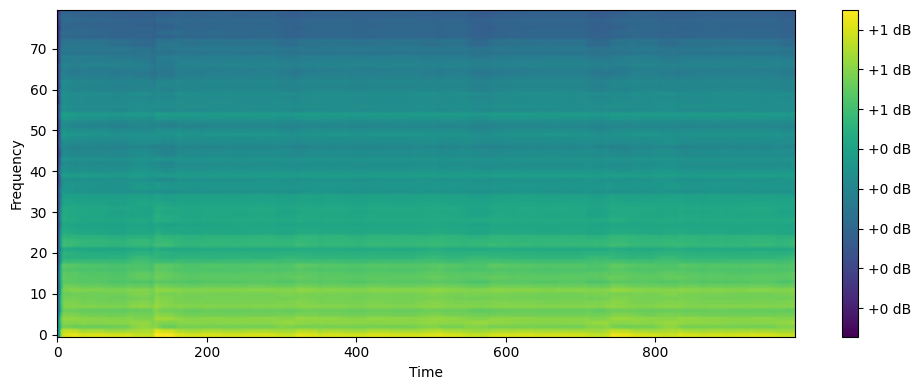

In [27]:
plot_spectrogram(results['read_female_one']['read_male_one'][2][1])